# Homework 5 - The Marvel Universe!

Superheroes and abilities have always existed in the human imagination. Marvel has one of the largest superhero comic book franchises. Famous superheroes, including Spider-Man, Iron Man, Captain America, and Thor, are among its cast, as are well-known superhero teams like the Avengers, X-Men, Fantastic Four, and Guardians of the Galaxy. Additionally, it has famous supervillains, including Doctor Doom, Magneto, Ultron, and Thanos, in its stable. Most of Marvel's fictional characters function in a single reality known as the Marvel Universe, with many of their headquarters located in New York City. These comics are well-known today because of their use in movies. If you do not know who we are talking about, [give this link a look](https://www.marvel.com/explore) and learn more about the characters.

This time, you and your team have decided to dive deep into Marvel's social network. Now, you will deal with graphs to determine relevant characteristics and highlights from the relations among those superheroes.

Let's hands-on this!

# VERY VERY IMPORTANT!

1. !!! Read the entire homework before coding anything!!!

2. My solution it's not better than yours, and yours is not better than mine. In any data analysis task, there is not a unique way to solve a problem. For this reason, it is crucial (necessary and mandatory) that you describe any single decision you take and all the steps you do.

3. Once performed any exercise, comments about the obtained results are mandatory. We are not always explicit about where to focus your comments, but we will always want brief sentences about your discoveries and decisions.

In this Homework, you will explore the Marvel Comics Universe, exploring relations between heroes and villains in the comics!

- __Backend__: where you need to develop efficient algorithms that define the functionalities of the system
- __Frontend__: where you provide visualization for queries entered by the user

__IMPORTANT:__ The main functions for each functionality should be written from scratch in the backend part. Nevertheless, you can use the data structures provided by networkx (such as closeness_centrality, betweenness_centrality, pagerank, or any other function that can help you as an intermediate step for your main functionalities).

In the visualization part, you can use any available function (networkx functions are highly recommended).

## 1. Data

To get started, you have to download the data, as always, from [here](https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network?select=hero-network.csv). Make sure you downloaded all files because we will work with them all.

In particular, the files contain the following:

- __nodes.csv__ - Contains two columns (node, type), indicating the nodes' name and type (comic, hero).
- __edges.csv__ - Contains two columns (hero, comic), indicating which comics the heroes appear in.
- __hero-network.csv__ - Contains the network of heroes who have appeared together in the comics.

### Graphs setup

For this homework, we are going to build two different graphs:

1. __First graph:__ Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.

2. __Second graph:__ The data in 'nodes.csv' and 'edges.csv' will be used to construct the second graph. The type of node (hero/comic) can be found in 'nodes.csv', and an edge between a hero node and a comic node can be found in 'edges.csv' when the hero has appeared in that specific comic. This graph is assumed to be undirected and unweighted.

### Data Preprocessing

As always, in the data science area, you can find some inconsistencies in the provided data. Therefore, some modifications should be made to the data to make it consistent across all of the datasets you have. To ensure consistency in the data, keep the following in mind:

1. Some of the heroes' names in 'hero-network.csv' are not found in 'edges.csv'. This inconsistency exists for the following reasons:
- Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
- Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
- The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.

2. Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.



In [1]:
import pandas as pd
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import numpy as np

Upload the datasets

In [2]:
# Contains the network of heroes who have appeared together in the comics.
df_hero = pd.read_csv('hero-network.csv')
print(df_hero.shape)
display(df_hero.head())

(574467, 2)


,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [3]:
# Contains two columns (hero, comic), indicating which comics the heroes appear in.
df_edges = pd.read_csv('edges.csv')
print(df_edges.shape)
display(df_edges.head())

(96104, 2)


,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [4]:
# Contains two columns (node, type), indicating the nodes' name and type (comic, hero).
df_nodes = pd.read_csv('nodes.csv')
print(df_nodes.shape)
display(df_nodes.head())

(19090, 2)


,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


#### Preprocessing

Remove any trailing spaces or '/' in the names:

In [5]:
print(df_hero.nunique())
df_hero["hero1"] = df_hero["hero1"].apply(lambda x: x.rstrip('/ '))
df_hero["hero2"] = df_hero["hero2"].apply(lambda x: x.rstrip('/ '))
print(df_hero.nunique())

hero1    6211
hero2    6173
dtype: int64
hero1    6206
hero2    6169
dtype: int64


Adjust Spiderman's name to make it consistent with other datasets:

- Visualize and see how many there are for column 'hero1':

In [6]:
print(df_hero[df_hero["hero1"]=='SPIDER-MAN/PETER PAR'].shape)
display(df_hero[df_hero["hero1"]=='SPIDER-MAN/PETER PAR'].head())

(6652, 2)


,hero1,hero2
398,SPIDER-MAN/PETER PAR,FIRESTAR/ANGELICA JO
399,SPIDER-MAN/PETER PAR,THUNDERBALL/DR. ELIO
400,SPIDER-MAN/PETER PAR,NAMORITA/NITA PRENTI
401,SPIDER-MAN/PETER PAR,SPEEDBALL/ROBBIE BAL
402,SPIDER-MAN/PETER PAR,HULK/DR. ROBERT BRUC


- Change the name and check that the rows with the old name are 0:

In [7]:
df_hero.hero1[df_hero["hero1"]=='SPIDER-MAN/PETER PAR'] = 'SPIDER-MAN/PETER PARKER'
print(df_hero[df_hero["hero1"]=='SPIDER-MAN/PETER PAR'].shape)

(0, 2)


- Check that the lines with the new name are the same number as the starting ones and display them:

In [8]:
print(df_hero[df_hero["hero1"]=='SPIDER-MAN/PETER PARKER'].shape)
display(df_hero[df_hero["hero1"]=='SPIDER-MAN/PETER PARKER'].head())

(6652, 2)


,hero1,hero2
398,SPIDER-MAN/PETER PARKER,FIRESTAR/ANGELICA JO
399,SPIDER-MAN/PETER PARKER,THUNDERBALL/DR. ELIO
400,SPIDER-MAN/PETER PARKER,NAMORITA/NITA PRENTI
401,SPIDER-MAN/PETER PARKER,SPEEDBALL/ROBBIE BAL
402,SPIDER-MAN/PETER PARKER,HULK/DR. ROBERT BRUC


- Repeat the steps for the 'hero2' column

In [9]:
df_hero.hero2[df_hero["hero2"]=='SPIDER-MAN/PETER PAR'] = 'SPIDER-MAN/PETER PARKER'
print(df_hero[df_hero["hero2"]=='SPIDER-MAN/PETER PARKER'].shape)
display(df_hero[df_hero["hero2"]=='SPIDER-MAN/PETER PARKER'].head())

(7065, 2)


,hero1,hero2
397,NOVA/RICHARD RIDER,SPIDER-MAN/PETER PARKER
1505,"STACY, PAUL",SPIDER-MAN/PETER PARKER
1510,"STACY, JILL",SPIDER-MAN/PETER PARKER
1514,"STACY, ARTHUR",SPIDER-MAN/PETER PARKER
1517,"PARKER, MAY",SPIDER-MAN/PETER PARKER


#### Create the first Graph

- As a first step add a column called 'weight' which is calculated as the inverse of the number of links between one node and another:


In [10]:
df_hero["weight"] = df_hero.groupby(["hero1", "hero2"])['hero2'].transform(lambda x: 1/x.count())
print(df_hero.shape)
display(df_hero.head())

(574467, 3)


,hero1,hero2,weight
0,"LITTLE, ABNER",PRINCESS ZANDA,0.20
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL,0.25
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA,0.25
3,"LITTLE, ABNER",PRINCESS ZANDA,0.20
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL,0.25


- Create the graph using 'MultiGraph' to have it indirect:

In [11]:
G1 = nx.from_pandas_edgelist(df_hero, "hero1", "hero2", "weight", create_using=nx.Graph())

- Display the number of nodes and the number of edges of the created graph:

In [12]:
print(f'Number of nodes: {G1.number_of_nodes()}')
print(f'Number of edges: {G1.number_of_edges()}')

Number of nodes: 6421
Number of edges: 167112


- Save the graph created with pickle:


In [13]:
with open("G1.pkl", "wb") as file:
    pickle.dump(G1, file)
# per rileggerlo
#with open("G1.pkl", "rb") as file:
#    G1 = pickle.load(file)

#### Create the second graph

- Add the nodes to the Graph

In [14]:
G2 = nx.from_pandas_edgelist(df_edges, "hero", "comic", create_using=nx.Graph())

- Add the nodes and their attributes to the graph:


In [15]:
G2.add_nodes_from(df_nodes["node"], type=df_nodes["type"])

- Display the number of nodes and the number of edges of the created graph:

In [16]:
print(f'Number of nodes: {G2.number_of_nodes()}')
print(f'Number of edges: {G2.number_of_edges()}')

Number of nodes: 19091
Number of edges: 96104


- Save the graph created with pickle:


In [17]:
with open("G2.pkl", "wb") as file:
    pickle.dump(G2, file)
# per rileggerlo
#with open("G2.pkl", "rb") as file:
#    G2 = pickle.load(file)

## 2. Backend Implementation

The goal of this part is the implementation of a controller system that has different functionalities. The controller should take as input an identifier "i" and run the associated function_i applied to the graph you create from the downloaded data.

__Definition:__ As the number of nodes and edges grows, we may request to work on a subset of the data to reduce computation time and improve network visualization. In this case, we will ask you only to consider the data for __top N heros__. We define the top N heroes as follows:

- __Top N heroes:__ The top N heroes who have appeared in the most number of comics. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

__Note:__ When the value of N is not set by the user, the function should consider the whole data.

### Functionality 1 - extract the graph's features

Input:

- The graph data
- The graph type (ex., number 1 or number 2)
- N: denoting the top N heroes that their data should be considered

Output:

- The number of nodes in the network (if type 2, report for both node types)
- The number of collaborations of each superhero with the others (only if type 1)
- The number of heroes that have appeared in each comic (only if type 2)
- The network's density
- The network's degree distribution
- The average degree of the network
- The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
- Whether the Network is sparse or dense

__Note:__ For this case, it makes sense to differentiate operations between the two graphs: for example, when computing hubs for the second graph, we likely care only about comics.


In [18]:
df_edges['hero'].value_counts()

SPIDER-MAN/PETER PARKER    1577
CAPTAIN AMERICA            1334
IRON MAN/TONY STARK        1150
THING/BENJAMIN J. GR        963
THOR/DR. DONALD BLAK        956
                           ... 
PROGENITOR                    1
DOMANI, DINO                  1
DOGGEREL                      1
DOCTOR, DR. JOSHUA            1
24-HOUR MAN/EMMANUEL          1
Name: hero, Length: 6439, dtype: int64

##### It's time to extract a list with the names of the top N heroes for G1 and a list with the names of the top N heroes and all the neighbors comics for G2. That's because G2 is a *bipartite graph*, so if we extract only the heroes node they will have degree equal to 0. So, for the G2 case, we choose to insert in the list of the top N also all the comic nodes near the hero.


In [19]:
def top_N_G1(data,N=G1.number_of_nodes()):
    top=data['hero'].value_counts().head(N)
    hero_list=top.index.tolist()
    return hero_list

In [30]:
def top_N_G2(data,N=G2.number_of_nodes()):
    top_hero=data['hero'].value_counts().head(N)
    hero_list=top_hero.index.tolist()
    for i in hero_list:
        top_comic=[n for n in G2.neighbors(i)]
    top=hero_list + top_comic
    return top, top_comic

#### For the first functionality we want to extract soma featurs from the Graph that the function takes in input.

In [56]:
def features(data, G, N):

    if G == G1:
        hero_list=top_N_G1(data, N)
        #create a subgraph eith the top heros nodes
        top=G.subgraph(hero_list)
        #number of nodes
        n_nodes=top.number_of_nodes()
        #number of collaborations of each superhero with the others
        degree=top.degree()
        #create a list with all the degree for each node
        degrees=[top.degree(n) for n in top.nodes()]
        #find the density
        density=round(nx.density(top),1)

        #decide when the Network is sparse or dense
        if density >0.6:
            types='Dense'
        else:
            types='Sparse'

        #find avarage degree
        ave_degree=(2*top.number_of_edges())/top.number_of_nodes()
        arr=np.array(degrees)
        #save th 95th percentile
        perc=np.percentile(arr, 95)
        #extract nodes having degrees more extensive than the 95th percentile
        hub=arr[arr >= perc]
        d=dict(top.degree())

        #save the hubs
        H=[]
        for i in hub:
            H.append(list(d.keys())[list(d.values()).index(i)])
        Hub=list(set(H))
        out=(n_nodes, degree, degrees, density, ave_degree, Hub, types)
        
    elif G== G2:
        list_G2,top_comic=top_N_G2(data, N)
        #create a subgraph eith the top heros and comics nodes
        top=G.subgraph(list_G2)
        #number of nodes
        n_nodes=top.number_of_nodes()
        heros=list(set(df_edges['hero']))
        #number of heroes that have appeared in each comic
        number_heros=top.degree(heros)
        #create a list with all the degree for each node
        degrees=[top.degree(n) for n in top.nodes()]
        #find the density
        density=round(nx.density(top),1)

        #decide when the Network is sparse or dense
        if density >0.6:
            types='Dense'
        else:
            types='Sparse'

        #find avarage degree
        ave_degree=(2*top.number_of_edges())/top.number_of_nodes()
        #hubs only for the comics
        comic=[top.degree(n) for n in top_comic]
        arr=np.array(comic)
        #save th 95th percentile
        perc=np.percentile(arr, 95)
        #extract nodes having degrees more extensive than the 95th percentile
        hub=arr[arr >= perc]
        d={top_comic[i]: comic[i] for i in range(len(top_comic))}

        #save the hubs
        H=[]
        for i in hub:
            H.append(list(d.keys())[list(d.values()).index(i)])
        Hub=list(set(H))
        out=(n_nodes, number_heros, degrees, density, ave_degree, Hub, types)
    
    else:
        raise ValueError('Invalid graph')

    return out

### Functionality 2 - Find top superheroes!

Input:

- The graph data
- A node (hero or comic)
- One of the given metrics : Betweeness 1, PageRank, ClosenessCentrality 3, DegreeCentrality
- N: denoting the top N heroes that their data should be considered

- Output:

- The metric's value over the considered graph
- The given node's value

__Note:__ Give an explanation regarding the features of the user based on all of the metrics (e.g. if the betweenness metric is high, what does this mean in practice, what if the betweenness is low but has a high PageRank value, etc.).

#### The second functionality is to find for each node a for a specific node the centrality measures

In [94]:
def top_superheroes(data, node, metric, N):
    #create the subgraph
    hero_list, top_comic=top_N_G2(data,N)
    G=G2.subgraph(hero_list)
    
    #check of the input metric
    if metric == 'betweenness_centrality':
        metric_values = nx.betweenness_centrality(G)
    elif metric == 'pagerank':
        metric_values = nx.pagerank(G)
    elif metric == 'closeness_centrality':
        metric_values = nx.closeness_centrality(G)
    elif metric == 'degree_centrality':
        metric_values = nx.degree_centrality(G)
    else:
        raise ValueError('Invalid metric')

    keys=[]
    values=[]
    #save the value of the input node
    for key, value in metric_values.items(): 
        #take only the keys for each node of the specific metric
        keys.append(key)
        #take only the values for each node of the specific metric
        values.append(value)
    for i in range(len(keys)):
        if keys[i]==node:
            node_value=values[i]
    #save the output
    out=values, node_value

    return out

#### The main centrality measures are:
* ***Betweenness Centrality:*** This measure count the number of times a node is on the shortest path between other nodes. It is useful for analyzing communication dynamics becauese we will know wich are the nodes in center of the network.
* ***PageRank:*** This measure uncovers nodes whose influence extends beyond their direct connections into the wider network. PageRank  takes link direction and weight into account, so links can only pass influence in one direction, and pass different amounts of influence.
* ***Closeness Centrality:*** This measure scores each node based on their ‘closeness’ to all other nodes in the network. It is used for finding the individuals who are best placed to influence the entire network most quickly.
* ***Degree Centrality:*** This measure assigns an importance score based simply on the number of links held by each node so it find very connected nodes in a network.

For example we can say that if a node has a small value of the betweenness but a high pagerank value it  is not in the center of the network but it has a broaden influence in a direction. If the the closeness value of a node is high but the degree is small it means that it is very influence because it's very close to some nodes, but there are other nodes in the network with high number of neighbors but further away.

### Functionality 3 - Shortest ordered Route

Input:

- The graph data
- A sequence of superheroes h = [h_2, ..., h_n-1]
- Initial node h_1 and an end node h_n
- N: denoting the top N heroes that their data should be considered

Output:

- The shortest walk of comics that you need to read to get from hero_1 to hero_n

Considerations: For this functionality, you need to implement an algorithm that returns the shortest __walk__ that goes from node h_j to h_n, which visits __in order__ the nodes in h. The choice of h_j and h_n can be made randomly (or if it improves the performance of the algorithm, you can also define it in any other way)

__Important Notes:__

- This algorithm should be run only on the second graph.
- The algorithm needs to handle the case that the graph is not connected. Thus, only some of the nodes in h are reachable from h_1. In such a scenario, it is enough to let the program give in the output the string "There is no such path".
- Since we are dealing with walks, you can pass on the same node h_i more than once, but you have to preserve order. E.g., if you start from __Spiderman__ to reach __deadpool__, and your path requires you to visit __iron-man__ and __colossus__, you can go back to any comics any time you want, assuming that the order in which you visit the heroes is still the same.

### Functionality 4 - Disconnecting Graphs

Input:

- The graph data
- heroA: a superhero to which will relate sub-graph G_a
- heroB: a superhero to which will relate sub-graph G_b
- N: denoting the top N heroes that their data should be considered

Output:

- The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.


### Functionality 5 - Extracting Communities

Input:

- The graph data
- N: denoting the top N heroes that their data should be considered
- Hero_1: denoting the name of one of the heroes
- Hero_2: denoting the name of one of the heroes

Output:

- The minimum number of edges that should be removed to form communities
- A list of communities, each containing a list of heroes that belong to them.
- If the Hero_1 and Hero_2 belongs to the same community

Important Notes:
This functionality should only be run on the first graph.
To comprehend this functionality better, we suggest you take a good look at this [article](https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/)

## 3. Frontend Implementation

In this section, we ask you to build the visualizations for users' query results. We also expect you to showcase plots that can give us the most insight possible and comment accordingly.

### Visualization 1 - Visualize some features of the network

We anticipate seeing the Functionality 1 report in Visualization 1. To be more specific, we expect you to have the following report format:

- A table containing the following general information about the graph:
    - Number of nodes in the network
    - Density of the network
    - Average degree of the network
    - Whether the network is sparse or dense
- A table that lists the network's hubs
- A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)
- A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)
- A plot depicting the degree distribution of the network

__Note:__ You can do the plot on a limited number of heroes/comic books to have a better visualization for the charts that ask for some insights about all of the comics/heroes (e.g. for the first 50)


In [23]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [24]:
from tabulate import tabulate

#### In the first table there are: Number of Nodes, Density, Average degree, Type of the Network of G1. In the second table there are all the hubs of the network.

In [58]:
n_nodes, degree, degree_distr, density, ave_degree, hubs, types=features(df_edges,G1, 50)

In [59]:
data = [[n_nodes,  density, ave_degree, types]]
  
#define header names
col_names = ["Number of Nodes", "Density", "Average degree", "Type of the Network"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

#save hubs names
data=[]
for i in hubs:
    data.append([i])

#define header names
col_names = ["Hubs' Name"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╤══════════════════╤═══════════════════════╕
│   Number of Nodes │   Density │   Average degree │ Type of the Network   │
╞═══════════════════╪═══════════╪══════════════════╪═══════════════════════╡
│                49 │         1 │           46.898 │ Dense                 │
╘═══════════════════╧═══════════╧══════════════════╧═══════════════════════╛
╒═════════════════════╕
│ Hubs' Name          │
╞═════════════════════╡
│ BLACK WIDOW/NATASHA │
├─────────────────────┤
│ CAPTAIN AMERICA     │
╘═════════════════════╛


* **A plot depicting the number of collaborations of each hero in descending order**

Text(0.5, 0, 'Rank')

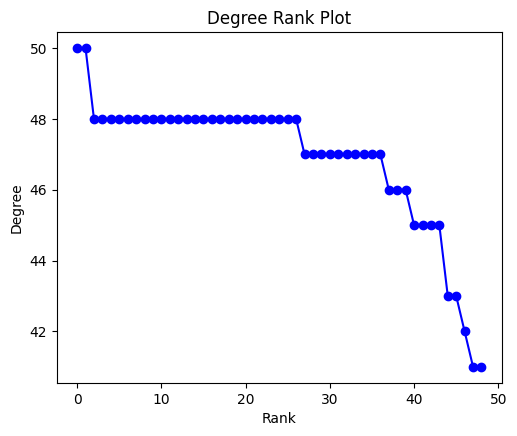

In [60]:
#register the degrees of our node in descending order and plot them
degree_sequence = sorted((d for d in degree_distr), reverse=True)
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
axgrid = fig.add_gridspec(5, 4)
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

* **A plot depicting the degree distribution of the network if it is G1**

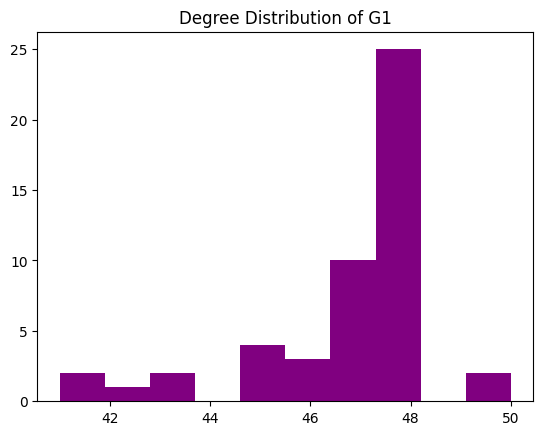

In [61]:
#histogram of the degree distribution of the network
plt.hist(degree_distr, color='purple')
plt.title('Degree Distribution of G1')
plt.show()

#### This are the same resuts for the G2 graph

In [62]:
n_nodes, number_heros, degrees, density, ave_degree, Hub, types=features(df_edges,G2, 50)

In [63]:
data = [[n_nodes,  density, ave_degree, types]]
  
#define header names
col_names = ["Number of Nodes", "Density", "Average degree", "Type of the Network"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

#save hubs names
data=[]
for i in Hub:
    data.append([i])

#define header names
col_names = ["Hubs' Name"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════╤═══════════╤══════════════════╤═══════════════════════╕
│   Number of Nodes │   Density │   Average degree │ Type of the Network   │
╞═══════════════════╪═══════════╪══════════════════╪═══════════════════════╡
│               320 │         0 │             11.3 │ Sparse                │
╘═══════════════════╧═══════════╧══════════════════╧═══════════════════════╛
╒══════════════╕
│ Hubs' Name   │
╞══════════════╡
│ M/SHSW 9     │
├──────────────┤
│ X 55         │
├──────────────┤
│ H2 277       │
├──────────────┤
│ FF 367       │
├──────────────┤
│ H2 278       │
├──────────────┤
│ FF 368       │
├──────────────┤
│ HR:R 4       │
├──────────────┤
│ M/GN 1       │
╘══════════════╛


Text(0.5, 0, 'Rank')

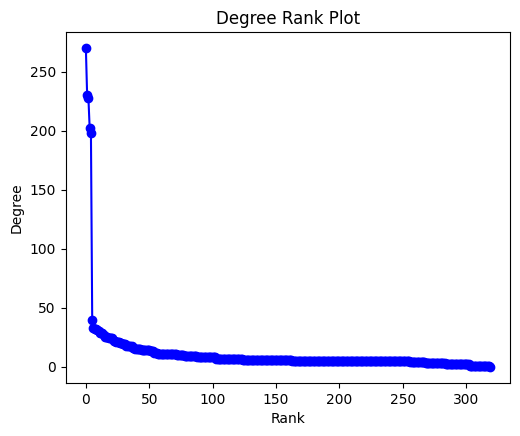

In [64]:
#register the degrees of our node in descending order and plot them
sequence_de= sorted((d for d in degrees), reverse=True)
fig = plt.figure("Degree of a random graph", figsize=(12, 12))
axgrid = fig.add_gridspec(5, 4)
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(sequence_de, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

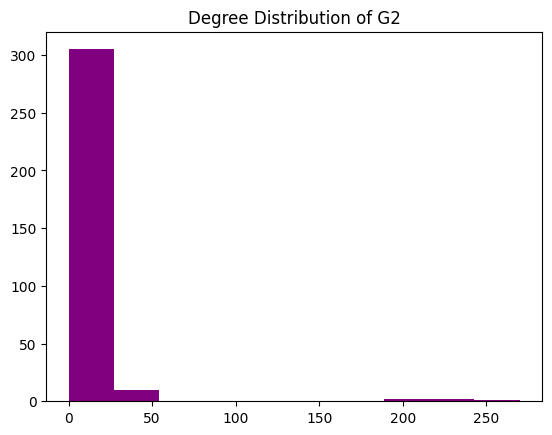

In [65]:
#histogram of the degree distribution of the network
plt.hist(degrees, color='purple')
plt.title('Degree Distribution of G2')
plt.show()

### Visualization 2 - Visualize centrality measure

We anticipate seeing the Functionality 2 report in Visualization 2. To be more specific, we expect you to have the following report format:

- A table containing the information related to the requested centrality measure for:
    - The average of the requested centrality measure for all of the network's nodes
    - The requested centrality measure's value for the given node

#### Take all the metrics for a specific node and the avarage value for all the nodes

In [95]:
between_values,node_between=top_superheroes(df_edges, 'CAPTAIN AMERICA', 'betweenness_centrality', 30)
avarage_between=np.average(np.array(between_values))

In [96]:
pagerank_values, node_prank=top_superheroes(df_edges, 'CAPTAIN AMERICA', 'pagerank', 30)
avarage_prank=np.average(np.array(pagerank_values))

In [97]:
close_values, node_close=top_superheroes(df_edges, 'CAPTAIN AMERICA', 'closeness_centrality', 30)
avarage_close=np.average(np.array(close_values))

In [98]:
centr_values, node_centr=top_superheroes(df_edges, 'CAPTAIN AMERICA', 'degree_centrality', 30)
avarage_centr=np.average(np.array(centr_values))

#### A table with the centrality measure and the average value of the metrics and the value of the specific node

In [99]:
data = [['betweenness_centrality',avarage_between, node_between],
       ['pagerank',avarage_prank,node_prank],
       ['closeness_centrality',avarage_close,node_close],
       ['degree_centrality', avarage_centr, node_centr]]
  
#define header names
col_names = ["Metric", "Avarage Value", "Node Value"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════╤══════════════╕
│ Metric                 │   Avarage Value │   Node Value │
╞════════════════════════╪═════════════════╪══════════════╡
│ betweenness_centrality │      0.00235014 │   0.00245181 │
├────────────────────────┼─────────────────┼──────────────┤
│ pagerank               │      0.00218818 │   0.00710277 │
├────────────────────────┼─────────────────┼──────────────┤
│ closeness_centrality   │      0.486416   │   0.367446   │
├────────────────────────┼─────────────────┼──────────────┤
│ degree_centrality      │      0.0270164  │   0.107456   │
╘════════════════════════╧═════════════════╧══════════════╛


Our node, ***CAPTAIN AMERICA***, has an higher degree rispect to the avarage of the network but the other measures are similar to the avarage. In general our nodes are close enough, but their pagerank and their betweenness are near to 0, in fact our network is sparse and its influence is not extensive.

### Visualization 3 - Visualize the shortest-ordered route

We anticipate seeing the Functionality 3 report in Visualization 3. To be more specific, we expect you to have the following report format:

- Print the comics in the shortest walk in order
- Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)

### Visualization 4 - Visualize the disconnected graph

We anticipate seeing the Functionality 4 report in Visualization 4. To be more specific, we expect you to have the following report format:

- Print the number of the links that should be disconnected
- Plot the original graph
- Plot the graph after removing the links and identify the two nodes


### Visualization 5 - Visualize the communities

We anticipate seeing the Functionality 5 report in Visualization 5. To be more specific, we expect you to have the following report format:

- Print the number of links that should be removed to have the communities
- A table depicting the communities and the heroes that belong to each community
- Plot the original graph
- Plot the graph showing the communities in the network
- Plot the final graph and identify the community/communities of Hero_1 and Hero_2

__Notes:__

- For the final output of your function, please set the Hero_1 to 'Captain America' and Hero_2 to 'Ironman' and show the results
- If Hero_1 and Hero_2 belong to the same community, identify that community; otherwise, identify those two communities that these heroes belong to.

## 4. Command Line Question

In this question, you should use any command line tools that you know to answer the following questions using the same datasets that you have been using so far:

- What is the most popular pair of heroes (often appearing together in the comics)?
- Number of comics per hero.
- The average number of heroes in comics.

__Note:__ You may work on this question in any environment (AWS, your PC command line, Jupyter notebook, etc.), but the final script must be placed in CommandLine.sh, which must be executable.


## 5. Bonus - PageRank on MapReduce

__IMPORTANT:__ This is a bonus step, so it's not mandatory. You can get the maximum score also without doing this. We will take this into account, __only if__ the rest of the homework has been completed.

1. PageRank and MapReduce go well together, and this synergy was essential for Google's growth and the MapReduce paradigm's proliferation. Therefore, for the bonus section of this homework, we ask that you __implement the PageRank algorithm using the MapReduce paradigm.__

Hint: [Here](https://www.cs.utah.edu/~jeffp/teaching/cs5140-S15/cs5140/L24-MR+PR.pdf) are __two approaches__ to implementing the PageRank algorithm using the MapReduce paradigm that you can use as a reference for your bonus part.

## 6. Algorithmic Question

Alex and Sarah have been together for two years, and Alex is now thinking about proposing to her. But, to surprise her, he wants to install an app on her phone that asks her if she will marry him at the right time.

However, to install the application secretly, he needs her phone's password, which he does not have. He knows her password is a __poly-line made up of vertical or horizontal line segments__. In a __3*3__ grid, each line segment connects the centres of two cells. Alex learned the direction of each line segment by looking at her hand while unlocking her phone. He didn't pay much attention to the length of each line segment, but he is sure that her phone's operating system __does not allow__ the poly-line __to intersect with itself even at one point.__

Alex wants to distract Sarah's attention long enough to test all possible patterns based on the directions of the line segments he has learned. Therefore, he needs you to assist him in calculating how many possible patterns he has to try based on those directions to estimate how much time he needs to check all of those possibilities. Given that the line segments were directed right, down, left, and up, the following figure depicts __two valid__ and __one invalid__ (as the poly-lines should not intersect even in one point) patterns.

__Input:__

The input is a __single string__ that shows the direction of the segment lines and contains only the characters R, L, U, and D, which correspond to the Right, Left, Up, and Down directions. The string's maximum length is __10__. It is also guaranteed that two consecutive characters will be different.

__Ouput:__

We expect to see only __1 number__ in the output, corresponding to the number of different patterns that can be generated based on the line segments Alex learned. In some cases, this number __may be 0__, indicating that no patterns can be generated using the learned line segments.

#### Examples:

__Input 1__

`DRU`

__Output 1__

`15`

__Input 2__

`R`

__Output 2__

`9`

__Input 3__

`LDRDRUL`

__Output 3__

`0`